**Daniel Yu**

Spring 2024

CS 252: Mathematical Data Analysis and Visualization

Project 3: Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import em

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: The EM Algorithm

### 3a. Implement multivariate Gaussian (`gaussian`)

Implement from scratch (i.e. using common numpy math functions and `np.linalg.det` and `np.linalg.inv`).

In [2]:
# Test 1: 2D data
np.random.seed(0)
test_xy = np.random.randn(5,2)
test_mu = np.random.uniform(size=(2,))
test_sigma = np.array([[2, 1.5], [1.5, 2]])

em_test = em.EM()
gauss_pdf = em_test.gaussian(test_xy, test_mu, test_sigma)
print(f'Your Gaussian PDF evaluated that the test points:\n{gauss_pdf}\nIt should be\n[0.06237 0.02907 0.00424 0.08301 0.08269]')

Your Gaussian PDF evaluated that the test points:
[0.06237 0.02907 0.00424 0.08301 0.08269]
It should be
[0.06237 0.02907 0.00424 0.08301 0.08269]


In [3]:
# Test 2: 4-dimensional data
np.random.seed(0)
test_10 = np.random.randn(5,4)
test_mu = np.random.uniform(size=(4,))
test_sigma = np.random.uniform(size=(4,4))
test_sigma = test_sigma.T @ test_sigma

em_test = em.EM()
gauss_pdf = em_test.gaussian(test_10, test_mu, test_sigma)
print(f'Your Gaussian PDF evaluated that the test points:\n{gauss_pdf}\nIt should be\n[0.      0.      0.      0.13288 0.     ]')

Your Gaussian PDF evaluated that the test points:
[0.      0.      0.      0.13288 0.     ]
It should be
[0.      0.      0.      0.13288 0.     ]


### 3b. Implement EM algorithm

Implement each of the following core methods in `em.py`. 

- `initialize`: Initialize cluster means, variance, and the probability that data samples belong to each of the clusters.
- `e_step`: Expectation step of EM algorithm. Compute probability each datapoint belongs to each cluster.
- `m_step`: Maximization step of EM algorithm. Compute each Gaussian cluster's mean and covariance matrix based on data assigned to each cluster.
- `log_likelihood`: Used in EM to monitor clustering progress and detect convergence. Log of sum of probabilities of all data points assigned to all clusters.
- `cluster`: Method that runs EM algorithm.

**E-Step equations:**

Compute the *responsibilities* ($w_{ci}$): the probability that data sample $i$ belongs to cluster $c$.

It can be computed in two stages: Determine $\hat{w}_{ci}$ then ${w}_{ci}$. $$\hat{w}_{ci} = \pi_c \times G\left (\mathbf{data}, \vec{\mu}_c, \mathbf{\Sigma_c}  \right )$$ Above, $\pi_c$ is the proportion of data samples that are associated with cluster $c$ (more on this below), $G(\cdot,\cdot,\cdot)$ is a multivariate Gaussian (representing cluster $c$), $\vec{\mu}_c$ is the mean (*centroid*) of that Gaussian cluster $c$, and $\mathbf{\Sigma_c}$ is the covariance matrix for cluster $c$.$${w}_{ci} = \frac{\hat{w}_{ci}}{\sum_{d=1}^{k}\hat{w}_{di}}$$


**M-Step equations:**

The job of the M-step is to compute the Gaussian cluster centroids ($\vec{\mu}_c$), Gaussian cluster covariance matrices ($\mathbf{\Sigma}_c$), and proportion of data samples that are associated each cluster ($\pi_c$).

$\pi_c$ is the average responsibility of all data samples with respect to each cluster $c$: $$\pi_c = \frac{1}{N}\sum_{j=1}^N w_{cj}$$
Note that above $N$ is the number of data samples. $$\vec{\mu}_c = \frac{1}{R_c} \sum_{j=1}^N w_{cj} \times \vec{\text{data}}_j $$
Above $R_c$ is defined as the sum of the responsibilities of all data samples belonging to one cluster: $R_c = \sum_{j=1}^N {w}_{cj}$.

Finally, the covariance of each cluster $\mathbf{\Sigma}_c$ is computed as: $$\mathbf{\Sigma}_c = \frac{1}{R_c} \sum_{j=1}^N w_{cj} \left ( \vec{\text{data}}_j - \vec{\mu}_c \right )^T \left ( \vec{\text{data}}_j - \vec{\mu}_c \right ) $$
where above $T$ indicates transpose.

**Log-likelihood:**

$$ll = \sum_{i=1}^N Log \left [\sum_{c=1}^k \pi_c f_c \left ( \vec{x}_i; \vec{\mu}_c, \Sigma_c \right ) \right]$$

where $f_c(\cdot)$ is the Gaussian distribution.

#### Test `e_step` (and `initialize`)

In [4]:
np.random.seed(0)

test_k = 2
test_data = np.random.randn(5,2)

em_test = em.EM(test_data)
em_test.k = test_k

em_test.initalize(test_k)
print(f'Your centroid shapes are {em_test.centroids.shape} and should be (2, 2)\n')

test_init_centroids = np.array([[1.76405, 0.40016], [0.97874, 2.24089]])
em_test.centroids = test_init_centroids
test_probs = em_test.e_step()
print(f'After 1 E step, your test responsibilities are:\n{test_probs}\nand should be:\n[[0.88106 0.11894 0.99024 0.91517 0.62642]\n\
 [0.11894 0.88106 0.00976 0.08483 0.37358]]')

Your centroid shapes are (2, 2) and should be (2, 2)

After 1 E step, your test responsibilities are:
[[0.88106 0.11894 0.99024 0.91517 0.62642]
 [0.11894 0.88106 0.00976 0.08483 0.37358]]
and should be:
[[0.88106 0.11894 0.99024 0.91517 0.62642]
 [0.11894 0.88106 0.00976 0.08483 0.37358]]


#### Test `m_step`

In [5]:
test_m, test_s, test_pi = em_test.m_step()

print(f'After 1 EM iteration, your means are\n{test_m}\n')
print(f'After 1 EM iteration, your covariance matrix is\n{test_s}\n')
print(f'After 1 EM iteration, your pi array is\n{test_pi}\n')

After 1 EM iteration, your means are
[[ 1.22452 -0.06511]
 [ 0.77131  1.46643]]

After 1 EM iteration, your covariance matrix is
[[[ 0.52278 -0.22681]
  [-0.22681  0.50843]]

 [[ 0.3101   0.21107]
  [ 0.21107  0.92664]]]

After 1 EM iteration, your pi array is
[0.70637 0.29363]



The above test should output:

    After 1 EM iteration, your means are
    [[ 1.22452 -0.06511]
     [ 0.77131  1.46643]]

    After 1 EM iteration, your covariance matrix is
    [[[ 0.52278 -0.22681]
      [-0.22681  0.50843]]

     [[ 0.3101   0.21107]
      [ 0.21107  0.92664]]]

    After 1 EM iteration, your pi array is
    [0.70637 0.29363]

#### Test `log_likelihood`

In [6]:
print(f'After running 1 EM iteration (above test code), your likelihood is\n{em_test.log_likelihood()}\nand it should be\n-11.394389039914211')

[[1.76405 0.40016]] [ 1.22452 -0.06511] [[ 0.52278 -0.22681]
 [-0.22681  0.50843]]
[0.14333]
[[1.76405 0.40016]] [0.77131 1.46643] [[0.3101  0.21107]
 [0.21107 0.92664]]
[0.0095]
[[0.97874 2.24089]] [ 1.22452 -0.06511] [[ 0.52278 -0.22681]
 [-0.22681  0.50843]]
[0.00089]
[[0.97874 2.24089]] [0.77131 1.46643] [[0.3101  0.21107]
 [0.21107 0.92664]]
[0.23326]
[[ 1.86756 -0.97728]] [ 1.22452 -0.06511] [[ 0.52278 -0.22681]
 [-0.22681  0.50843]]
[0.14196]
[[ 1.86756 -0.97728]] [0.77131 1.46643] [[0.3101  0.21107]
 [0.21107 0.92664]]
[0.00007]
[[ 0.95009 -0.15136]] [ 1.22452 -0.06511] [[ 0.52278 -0.22681]
 [-0.22681  0.50843]]
[0.30384]
[[ 0.95009 -0.15136]] [0.77131 1.46643] [[0.3101  0.21107]
 [0.21107 0.92664]]
[0.04443]
[[-0.10322  0.4106 ]] [ 1.22452 -0.06511] [[ 0.52278 -0.22681]
 [-0.22681  0.50843]]
[0.0629]
[[-0.10322  0.4106 ]] [0.77131 1.46643] [[0.3101  0.21107]
 [0.21107 0.92664]]
[0.08219]
After running 1 EM iteration (above test code), your likelihood is
-11.394394334458282
and

#### Test `cluster`

Use `np.genfromtxt` or `np.loadtxt` to load in the `super_simple` dataset. Assign it to the variable `super_simple` then run the following test code to create a plot of your Gaussian clusters. It should look like the following image.

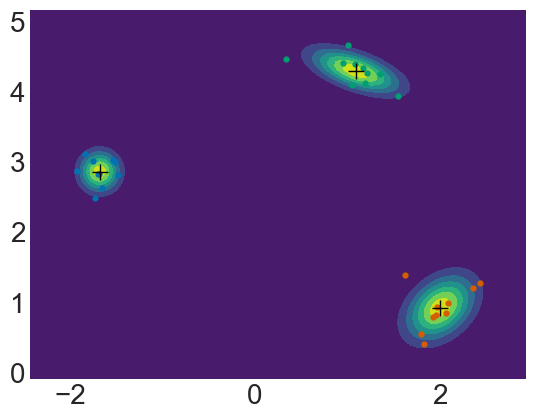

[[0.338  4.4672]] [-1.63222  2.88735] [[0.1427  0.06717]
 [0.06717 0.07732]]
[0.]
[[0.338  4.4672]] [1.08278 4.26964] [[ 0.13622 -0.0224 ]
 [-0.0224   0.09316]]
[0.18236]
[[0.338  4.4672]] [2.00528 0.92504] [[0.05823 0.01958]
 [0.01958 0.11056]]
[0.]
[[-1.5339  3.025 ]] [-1.63222  2.88735] [[0.1427  0.06717]
 [0.06717 0.07732]]
[1.73886]
[[-1.5339  3.025 ]] [1.08278 4.26964] [[ 0.13622 -0.0224 ]
 [-0.0224   0.09316]]
[0.]
[[-1.5339  3.025 ]] [2.00528 0.92504] [[0.05823 0.01958]
 [0.01958 0.11056]]
[0.]
[[-1.695  2.828]] [-1.63222  2.88735] [[0.1427  0.06717]
 [0.06717 0.07732]]
[1.92498]
[[-1.695  2.828]] [1.08278 4.26964] [[ 0.13622 -0.0224 ]
 [-0.0224   0.09316]]
[0.]
[[-1.695  2.828]] [2.00528 0.92504] [[0.05823 0.01958]
 [0.01958 0.11056]]
[0.]
[[-1.6546  2.6227]] [-1.63222  2.88735] [[0.1427  0.06717]
 [0.06717 0.07732]]
[0.97064]
[[-1.6546  2.6227]] [1.08278 4.26964] [[ 0.13622 -0.0224 ]
 [-0.0224   0.09316]]
[0.]
[[-1.6546  2.6227]] [2.00528 0.92504] [[0.05823 0.01958]
 [0.01958

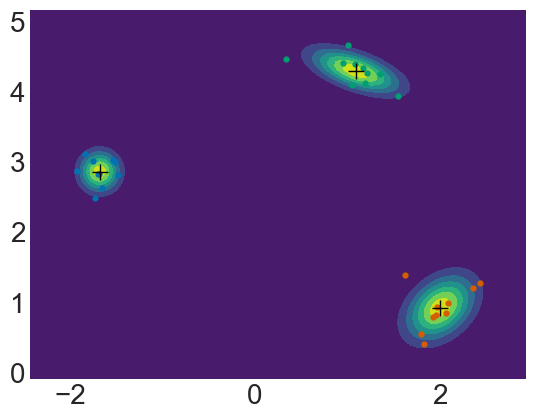

In [7]:
# LOAD IN DATASET HERE
super_simple = np.array(np.genfromtxt('data/super_simple.csv', delimiter = ',', skip_header = 1))
simple_k = 3
simple_max_iter = 100

np.random.seed(0)
simple_test = em.EM(super_simple)

simple_test.cluster(k=simple_k, max_iter=simple_max_iter, verbose=True)
simple_test.plot_clusters(super_simple)

### 3c. EM algorithm animation visualization

- Add an optional parameter to `EM::cluster` called `animate`. By default, make it set to False.
- In the main EM loop, after performing a full iteration of EM, call the `plot_clusters` method (if `animate` is true). Immediately before your method call, add the code: `clear_output(wait=True)`. Immediately after, add the code: `plt.pause(0.1)` (The parameter, 0.1 in this case, is the wait time in seconds between plot updates in the animation).

Running this test code, should produce a (**very cool**) animation showing the EM algorithm unfolding over time. You should see if overcome a challenging initial condition.

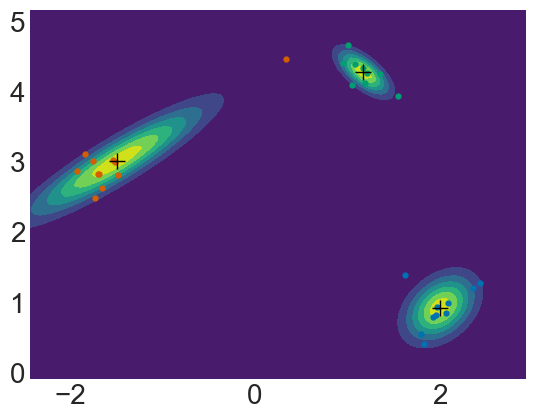

[[0.338  4.4672]] [2.00717 0.9184 ] [[0.05531 0.02591]
 [0.02591 0.08605]]
[0.]
[[0.338  4.4672]] [1.17452 4.27358] [[ 0.02972 -0.02354]
 [-0.02354  0.03985]]
[0.]
[[0.338  4.4672]] [-1.49772  3.00537] [[0.35397 0.26834]
 [0.26834 0.24396]]
[0.01071]
[[-1.5339  3.025 ]] [2.00717 0.9184 ] [[0.05531 0.02591]
 [0.02591 0.08605]]
[0.]
[[-1.5339  3.025 ]] [1.17452 4.27358] [[ 0.02972 -0.02354]
 [-0.02354  0.03985]]
[0.]
[[-1.5339  3.025 ]] [-1.49772  3.00537] [[0.35397 0.26834]
 [0.26834 0.24396]]
[1.29041]
[[-1.695  2.828]] [2.00717 0.9184 ] [[0.05531 0.02591]
 [0.02591 0.08605]]
[0.]
[[-1.695  2.828]] [1.17452 4.27358] [[ 0.02972 -0.02354]
 [-0.02354  0.03985]]
[0.]
[[-1.695  2.828]] [-1.49772  3.00537] [[0.35397 0.26834]
 [0.26834 0.24396]]
[1.24557]
[[-1.6546  2.6227]] [2.00717 0.9184 ] [[0.05531 0.02591]
 [0.02591 0.08605]]
[0.]
[[-1.6546  2.6227]] [1.17452 4.27358] [[ 0.02972 -0.02354]
 [-0.02354  0.03985]]
[0.]
[[-1.6546  2.6227]] [-1.49772  3.00537] [[0.35397 0.26834]
 [0.26834 0.24

In [8]:
np.random.seed(4)

simple_k = 3
simple_max_iter = 100

simple_test = em.EM(super_simple)
simple_test.cluster(k=simple_k, max_iter=simple_max_iter, verbose=False, animate=True);

### 3d. Outlier detection with EM algorithm

Because the EM algorithm computes the probability that each data sample belongs to each cluster, it can be used to detect outliers in the dataset.

- Implement `find_outliers` in `em.py`.
- Run the following code to find outliers in the `super_simple` dataset (defined as samples belonging to a cluster that have probability < 0.5 here).

In [9]:
# Find outliers in all 3 clusters
outliers = simple_test.find_outliers(thres=0.5)
print(f'Sample indices of your outliers are\n{outliers}\nand they should be\n[(array([20, 26]),), (array([], dtype=int64),), (array([ 0, 18, 28]),)]')

Sample indices of your outliers are
[array([20, 26]), array([], dtype=int32), array([ 0, 18, 28])]
and they should be
[(array([20, 26]),), (array([], dtype=int64),), (array([ 0, 18, 28]),)]


- In the cell below, superimpose a plot on the cluster plot, indicating the outliers that you found with star markers (make them large so that they stand out).

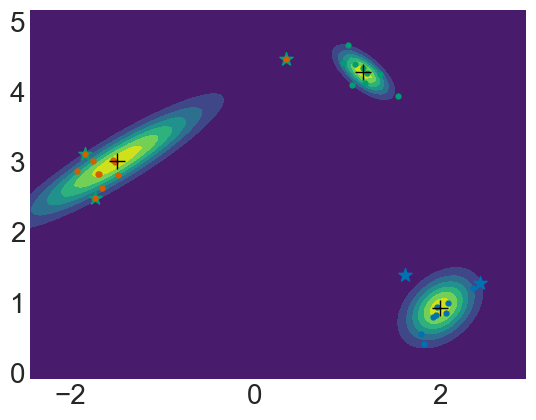

In [10]:
simple_test.plot_clusters(super_simple, show=False)

# Your code here
plt.scatter(simple_test.data[outliers[0],0],simple_test.data[outliers[0],1], marker="*",s = 100,)
# plt.scatter(simple_test.data[outliers[1],0],simple_test.data[outliers[1],1], marker="*",s = 100)
plt.scatter(simple_test.data[outliers[2],0],simple_test.data[outliers[2],1], marker="*",s = 100)
plt.show()

## Task 4: Cluster a dataset of your choice with EM algorithm

- Select a 2D dataset (one we've worked with before or a new one of your choice).
    - You may select a higher dimensional dataset, but only run EM on 2 variables **that make sense (see next item)**
    <!-- - You may select a higher dimensional dataset and run PCA to reduce the dimensionality to 2D. -->
- Formulate a question (see question below) that could be addressed by cluster analysis.
- Import/preprocess to prepare the data for clustering by the EM algorithm.
- Analyze the data. Minimally, this should include:
    - Select a k that makes sense to you (you may explore this more rigorously as an extension).
    - Plot of the 2D data clustered.
    - Detect and show outliers
    - Report the final log likelihood of the clustering.

Iteration 1: Log Likelihood = 133.29075231665408
Iteration 2: Log Likelihood = 208.52977732373768
Iteration 3: Log Likelihood = 233.19247329034812
Iteration 4: Log Likelihood = 233.94772414479004
Total number of iterations: 5


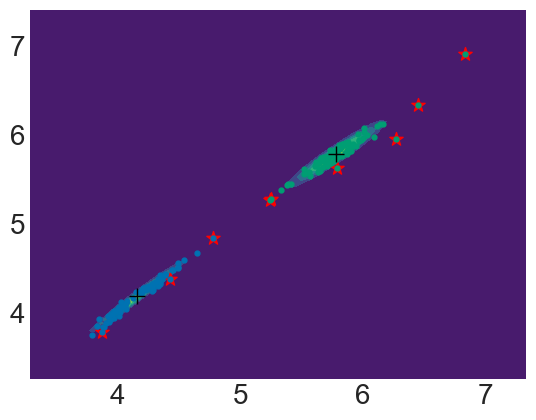

[133.29075231665408, 208.52977732373768, 233.19247329034812, 233.94772414479004, 233.94772540835754]


In [12]:
np.random.seed(1)
diamond_data = np.array(np.genfromtxt('data/DiamondsPrices.csv', delimiter = ',', skip_header = 1))[:,(7,8)]
diamond = em.EM(diamond_data)
diamond.cluster(k=2,max_iter=100,verbose=True)
diamond.plot_clusters(diamond_data, show=False)
outliers = diamond.find_outliers(thres=0.6)
plt.scatter(diamond.data[outliers[0],0],diamond.data[outliers[0],1], marker="*",s = 100,c='r')
plt.scatter(diamond.data[outliers[1],0],diamond.data[outliers[1],1], marker="*",s = 100,c='r')
plt.show()
print(diamond.loglikelihood_hist)

**Question 6:** What dataset did you select for clustering?

**Answer 6:** I used a Diamonds Price data set, but I had to shorten the sample size to about 200 because of the runtime, and for clarity.

**Question 7:** Which two variables did you select for clustering? What question are you exploring, which you believe could be addressed by a cluster analysis?

**Answer 7:** I basically just plotted their sizes as x and y, with x being their their x idimension and y being their y dimension respectively with the axises, I wanted to see if it was possible that there were certain groups of diamond sizes that would be considered traditional for proportions. For example if there were diamonds in the set that were wider tthan normal, or etc. It seems like they are mostly same in x and y, with some few exceptions.

**Question 8:** What is your interpretation of what the outliers that you detected mean in the context of your dataset?

**Answer:** There are some diamonds that were gathered that were abnormally not similar in dimensions. Usually we would expect by this correlation that diamonds would be basically a square, but it doesn't seem to be the case for some. There are also some diamonds like the one near the 7 tick mark that are abnormally large. The log likelihood is extremely high here, whihc means the clustering is pretty good! With the exception of the outliers.

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions.** This includes both written analysis, plotting, and code. We will only grade **your** work, not an AI's. **We will stop grading your project if we notice AI-generated content (to any capacity).**

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1) Image compression

- Run K-means on other images and quantify the reduction in space (i.e. compression ratio) required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. silhouette score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

*Reminder that you need to cite your sources — i.e. how did you learn about other cluster detection metrics?*

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

### 6) K-means++

- Research and implement the K-means++ algorithm for initializing the centroids in K-means.

*Reminder that you need to cite your sources — i.e. how did you learn about K-means++?*

### 7) Make an `elbow_plot` for EM algorithm

- Test out and explain results of your `elbow_plot` method on a dataset.

NOTE: Log likelihood is negative and higher is better. Factor this into your interpretation.

### 8) K-means vs. EM algorithm

- Compare the efficiency of K-means and EM. Create plots showing runtime, number of iterations, etc. Analyze / interpret the results.

# NOTE #

I did some extensions before this part of the project, so check image_segmentation.ipynb for the other 2!

## COMPARING K-means vs. EM algorithm

Fundementally, K-means SHOULD has lower runtime compared to EM, as it involves simpler computations. However, runtime of both algorithms can depend on factors such as the dataset size, dimensionality, and initialization method, so that's why we're gonna test them!.

Let's can consider factors such as runtime and number of iterations. We'll create plots to visualize these metrics and then analyze the results.
To setup, w We'll generate somarbitraryic data and run both algorithms on it. We'll vary the number of clusters and observe how runtime and number of iterations change..

This code will generate plots comparing the runtime and number of iterations for K-means and EM as the number of clusters varies. g quality.

Total number of iterations: 2
Total number of iterations: 2
Total number of iterations: 2
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 93
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100
Total number of iterations: 100


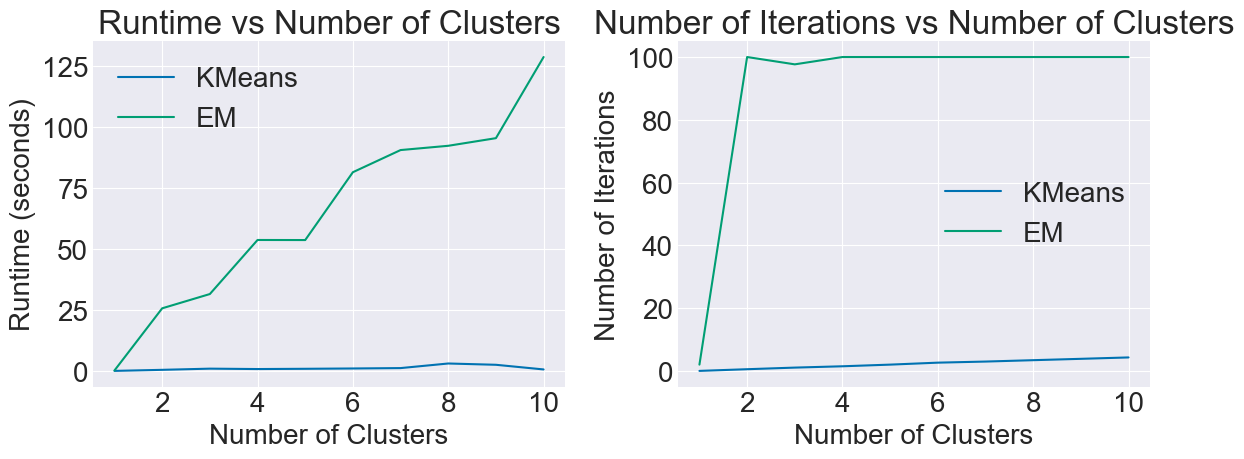

In [23]:
import time
import kmeans
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
num_features = 2
data = np.random.randn(num_samples, num_features)

# Initialize KMeans and EM objects
kmeans = kmeans.KMeans(data)
em = em.EM(data)

# Parameters for comparison
max_clusters = 10
num_runs = 3

# Lists to store results
kmeans_runtimes = []
em_runtimes = []
kmeans_iterations = []
em_iterations = []

# Loop over different number of clusters
for k in range(1, max_clusters + 1):
    kmeans_times = []
    em_times = []
    kmeans_iters = []
    em_iters = []
    for _ in range(num_runs):
        # Measure KMeans runtime and iterations
        start_time = time.time()
        kmeans.cluster(k=k)
        end_time = time.time()
        kmeans_times.append(end_time - start_time)
        kmeans_iters.append(kmeans.get_data_centroid_labels())
        
        # Measure EM runtime and iterations
        start_time = time.time()
        em.cluster(k=k)
        end_time = time.time()
        em_times.append(end_time - start_time)
        em_iters.append(len(em.loglikelihood_hist))
    
    # Average runtimes and iterations over multiple runs
    kmeans_runtimes.append(np.mean(kmeans_times))
    em_runtimes.append(np.mean(em_times))
    kmeans_iterations.append(np.mean(kmeans_iters))
    em_iterations.append(np.mean(em_iters))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), kmeans_runtimes, label='KMeans')
plt.plot(range(1, max_clusters + 1), em_runtimes, label='EM')
plt.title('Runtime vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Runtime (seconds)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, max_clusters + 1), kmeans_iterations, label='KMeans')
plt.plot(range(1, max_clusters + 1), em_iterations, label='EM')
plt.title('Number of Iterations vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Iterations')
plt.legend()

plt.tight_layout()
plt.show()

After running this code (which took forever mind you), we can see:

K-means generally has lower runtime compared to EM across different numbers of clusters. We expected this because K-means has a simpler algorithmic structure compared to EM, which involves computing Gaussian probabilities and updating responsibilities. K-means also converges faster (i.e., requires fewer iterations) than EM. This is because K-means updates centroids directly based on data assignments, while EM involves multiple steps (E-step and M-step) for updating responsibilities, centroids, and covariance matrices.

### In summary, ###

K-means is generally more efficient for large datasets due to its simplicity and computational efficiency. It can handle datasets with a large number of samples and dimensions. EM may become computationally expensive for high-dimensional data or a large number of clusters, as it involves estimating parameters for each component of the mixture model. <b>It is a trade-off for runtime and for information.<b>

## AGAIN, check image_segmentation.ipynb FOR MY OTHER EXTENSIONS! ##